In [3]:
import pandas as pd

# Load the CSV data
data = pd.read_csv('GooglePlayStoreApps.csv')

# Inspect the data
print(data.head())
print(data.info())


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size_in_MB  Installs  Type  Price  \
0  ART_AND_DESIGN     4.1      159        19.0     10000  Free    0.0   
1  ART_AND_DESIGN     3.9      967        14.0    500000  Free    0.0   
2  ART_AND_DESIGN     4.7    87510         8.7   5000000  Free    0.0   
3  ART_AND_DESIGN     4.5   215644        25.0  50000000  Free    0.0   
4  ART_AND_DESIGN     4.3      967         2.8    100000  Free    0.0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art 

In [13]:
data

,Unnamed: 0,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,CURRENT_VERSION,ANDROID_VERSION
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10837,10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10838,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
# Check for missing values
print(data.isnull().sum())

# Drop rows or fill missing values as needed
data = data.dropna(subset=['Rating'])  # Example: drop rows where 'Rating' is missing
data['Size_in_MB'] = pd.to_numeric(data['Size_in_MB'], errors='coerce')  # Convert to numeric if needed


Unnamed: 0         0
App                0
Category           0
Rating             0
Reviews            0
Size_in_MB         0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
CURRENT_VERSION    0
ANDROID_VERSION    0
dtype: int64


In [7]:
# Compute correlation between 'Rating' and 'Reviews'
rating_reviews_corr = data['Rating'].corr(data['Reviews'])
print(f"Correlation between Rating and Reviews: {rating_reviews_corr:.2f}")

# Compute correlation between 'Rating' and 'Installs'
rating_installs_corr = data['Rating'].corr(data['Installs'])
print(f"Correlation between Rating and Installs: {rating_installs_corr:.2f}")

# Compute correlation for 'Price' and 'Rating' (for Paid apps)
price_rating_corr = data.loc[data['Price'] > 0, ['Price', 'Rating']].corr().iloc[0, 1]
print(f"Correlation between Price and Rating (Paid apps only): {price_rating_corr:.2f}")


Correlation between Rating and Reviews: 0.06
Correlation between Rating and Installs: 0.05
Correlation between Price and Rating (Paid apps only): -0.10


In [9]:
# Mean rating by category
mean_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Mean Rating by Category:")
print(mean_rating_by_category.head(5))

# Mean size comparison for free vs. paid apps
mean_size_free_vs_paid = data.groupby('Type')['Size_in_MB'].mean()
print("Mean Size of Free vs. Paid Apps:")
print(mean_size_free_vs_paid)

# Mean reviews for recently updated vs. not recently updated apps
mean_reviews_updated = data['Reviews'][data['Last Updated'] >= '2017-01-01'].mean()
mean_reviews_not_updated = data['Reviews'][data['Last Updated'] < '2017-01-01'].mean()
print(f"Mean Reviews (Recently Updated): {mean_reviews_updated:.2f}")
print(f"Mean Reviews (Not Recently Updated): {mean_reviews_not_updated:.2f}")


Mean Rating by Category:
Category
EVENTS                 4.395313
EDUCATION              4.388462
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.335498
PERSONALIZATION        4.328827
Name: Rating, dtype: float64
Mean Size of Free vs. Paid Apps:
Type
Free    20.30379
Paid    18.70823
Name: Size_in_MB, dtype: float64
Mean Reviews (Recently Updated): 444152.90
Mean Reviews (Not Recently Updated): nan


In [11]:
# Define condition for highly rated apps (rating >= 4.5)
highly_rated_apps = data['Rating'] >= 4.5

# Proportion of highly rated apps for Free and Paid apps
proportion_highly_rated_free = highly_rated_apps[data['Type'] == 'Free'].mean()
proportion_highly_rated_paid = highly_rated_apps[data['Type'] == 'Paid'].mean()
print(f"Proportion of Highly Rated Free Apps: {proportion_highly_rated_free:.2%}")
print(f"Proportion of Highly Rated Paid Apps: {proportion_highly_rated_paid:.2%}")

# Proportion of highly rated apps by content rating
apps_everyone = data['Content Rating'] == 'Everyone'
proportion_everyone_high_rated = highly_rated_apps[apps_everyone].mean()
proportion_teen_mature_high_rated = highly_rated_apps[~apps_everyone].mean()
print(f"Proportion of Highly Rated Apps (Everyone): {proportion_everyone_high_rated:.2%}")
print(f"Proportion of Highly Rated Apps (Teen & Mature): {proportion_teen_mature_high_rated:.2%}")


Proportion of Highly Rated Free Apps: 26.63%
Proportion of Highly Rated Paid Apps: 35.12%
Proportion of Highly Rated Apps (Everyone): 27.45%
Proportion of Highly Rated Apps (Teen & Mature): 26.48%


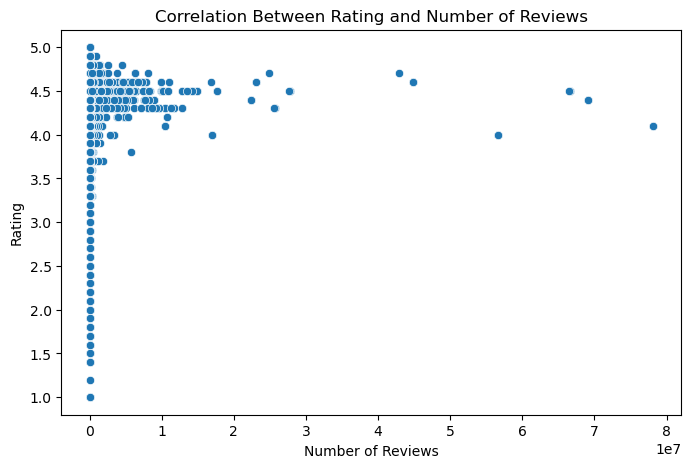

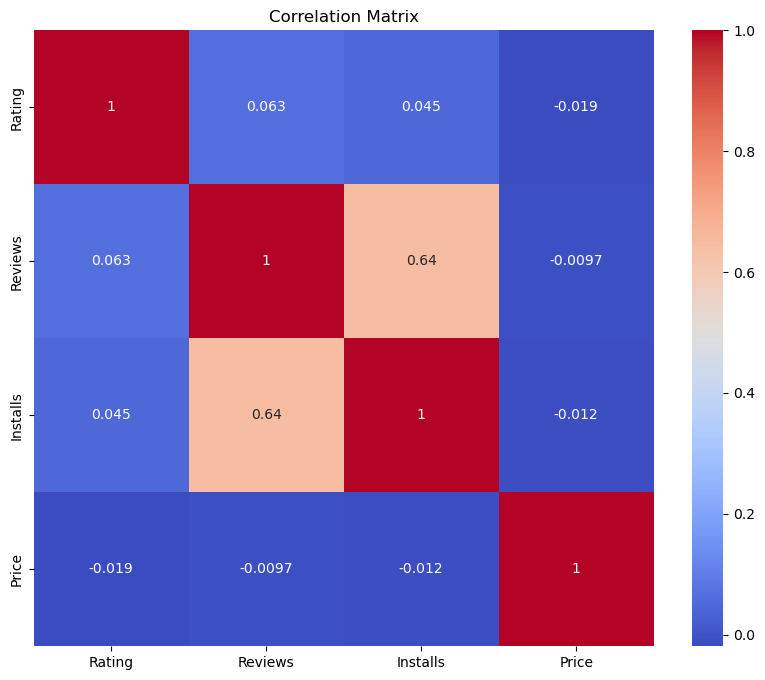

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for correlation between Rating and Reviews
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Reviews'], y=data['Rating'])
plt.title('Correlation Between Rating and Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

# Heatmap for correlations among numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Rating', 'Reviews', 'Installs', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


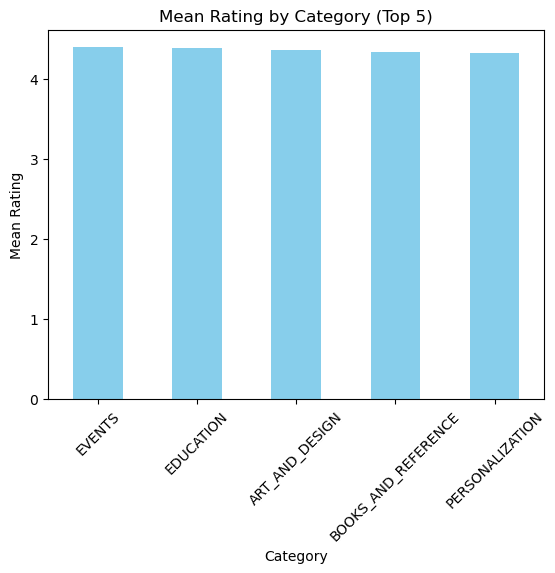

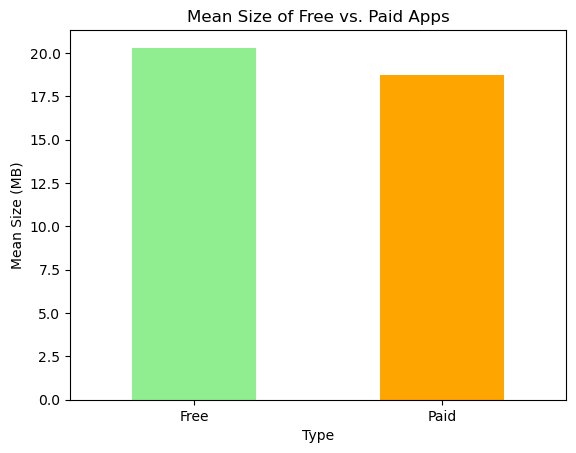

In [23]:
# Bar plot for Mean Rating by Category (Top 5)
mean_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)
mean_rating_by_category.plot(kind='bar', color='skyblue')
plt.title('Mean Rating by Category (Top 5)')
plt.xlabel('Category')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Mean Size of Free vs. Paid Apps
mean_size_free_vs_paid = data.groupby('Type')['Size_in_MB'].mean()
mean_size_free_vs_paid.plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Mean Size of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Mean Size (MB)')
plt.xticks(rotation=0)
plt.show()


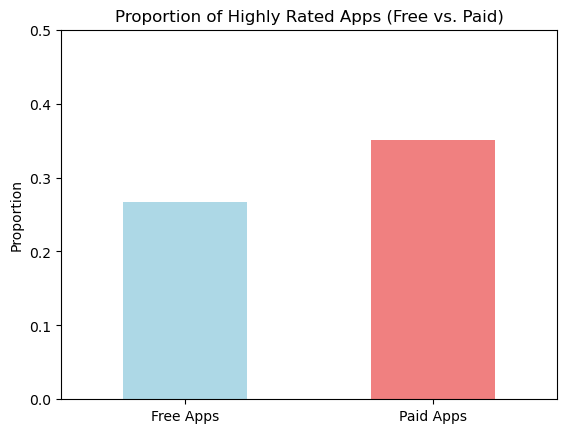

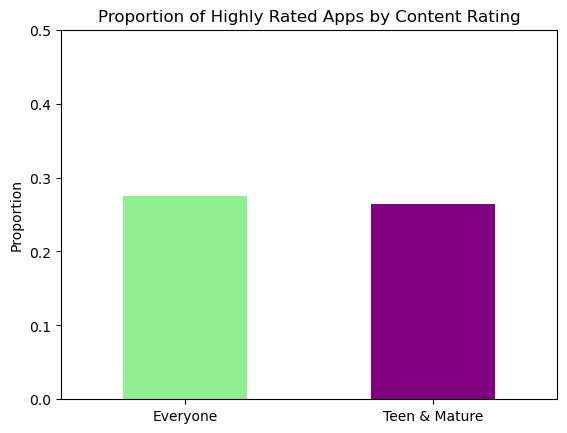

In [25]:
# Proportions of Highly Rated Apps (Free vs. Paid)
proportions = pd.Series({
    'Free Apps': proportion_highly_rated_free,
    'Paid Apps': proportion_highly_rated_paid
})
proportions.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Proportion of Highly Rated Apps (Free vs. Paid)')
plt.ylabel('Proportion')
plt.ylim(0, 0.5)
plt.xticks(rotation=0)
plt.show()

# Proportions of Highly Rated Apps by Content Rating
content_rating_proportions = pd.Series({
    'Everyone': proportion_everyone_high_rated,
    'Teen & Mature': proportion_teen_mature_high_rated
})
content_rating_proportions.plot(kind='bar', color=['lightgreen', 'purple'])
plt.title('Proportion of Highly Rated Apps by Content Rating')
plt.ylabel('Proportion')
plt.ylim(0, 0.5)
plt.xticks(rotation=0)
plt.show()


In [27]:
from scipy.stats import ttest_ind

# Extract ratings for free and paid apps
free_apps_ratings = data[data['Type'] == 'Free']['Rating'].dropna()
paid_apps_ratings = data[data['Type'] == 'Paid']['Rating'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(free_apps_ratings, paid_apps_ratings, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in mean ratings between free and paid apps.")
else:
    print("There is no significant difference in mean ratings between free and paid apps.")


T-statistic: -3.98, P-value: 0.0001
There is a significant difference in mean ratings between free and paid apps.


In [29]:
from scipy.stats import chi2_contingency

# Create a contingency table for highly rated apps
highly_rated_contingency = pd.crosstab(data['Type'], data['Rating'] >= 4.5)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(highly_rated_contingency)
print(f"Chi-square statistic: {chi2:.2f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the proportion of highly rated apps between free and paid types.")
else:
    print("There is no significant difference in the proportion of highly rated apps between free and paid types.")


Chi-square statistic: 26.52, P-value: 0.0000
There is a significant difference in the proportion of highly rated apps between free and paid types.
